# Konwolucyjne sieci neuronowe

## Convolution neural networks, CNN

# Filtry jako ekstraktory informacji

<img src="Grafika/Filter.png" width="550">

<img src="Grafika/OriginalAndFilter.png" width="550">

<img src="Grafika/FirstPixelMulitiplication.png" width="550">

<img src="Grafika/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

### Filtrowanie - konwolucja (splot):

<img src="Grafika/matrixConvolution.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpga

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="Grafika/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

### W przypadku macierzy trójwymiarowych, filtrowanie (2D) wygląda tak:

<img src="https://i.stack.imgur.com/FjvuN.gif" width="550">

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wagi w filtrach.

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="Grafika/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="Grafika/MaxPool.png" width="550">

Źródło: https://adeshpande3.github.io/assets/MaxPool.png

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce z reguły po każdej warstwie konwolucyjnej daje się max pooling.

### Wielowarstwowa sieć konwolucyjna

Wielowarstwowe sieci konwolucyjne wykorzystują wielokrotne składanie operacji filtrowania i uczą się wykrywać bardzo złożone zależności.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="Grafika/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Oczywiście można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

### Uwaga. Filtr dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą liczbie filtrów w poprzedniej warstwie.

<img src="Grafika/conv3D.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

Naturalnie, jeżeli na wejściu mamy obiekt więcej niż dwu-wymiarowy to już pierwsza warstwa używa filtrów, które są kostkami.

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="Grafika/Stride1.png" width="600">

Strides = (2,2)

<img src="Grafika/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


# Zad

Pobierzmy zbiór danych

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

from numpy.random import seed
seed(123)


2.13.1


In [4]:
import numpy as np
import pandas as pd
import os
import np_utils
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names

In [5]:
X[0] # wektor - pozniej zamienimy na macierz, bo to jest obraz

array([0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
       0.3803922 ], dtype=float32)

In [6]:
X.shape

(1288, 1850)

In [7]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([ 77, 236, 121, 530, 109,  71, 144]))

In [8]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [10]:
# przygotowanie y
y = keras.utils.to_categorical(y)
y[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
n_classes = y.shape[1]
n_classes

7

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])
print(X_train.shape)

(772, 50, 37, 1)


### skalowanie X

In [13]:
# skalowanie X

X_train = X_train/255
X_test = X_test/255

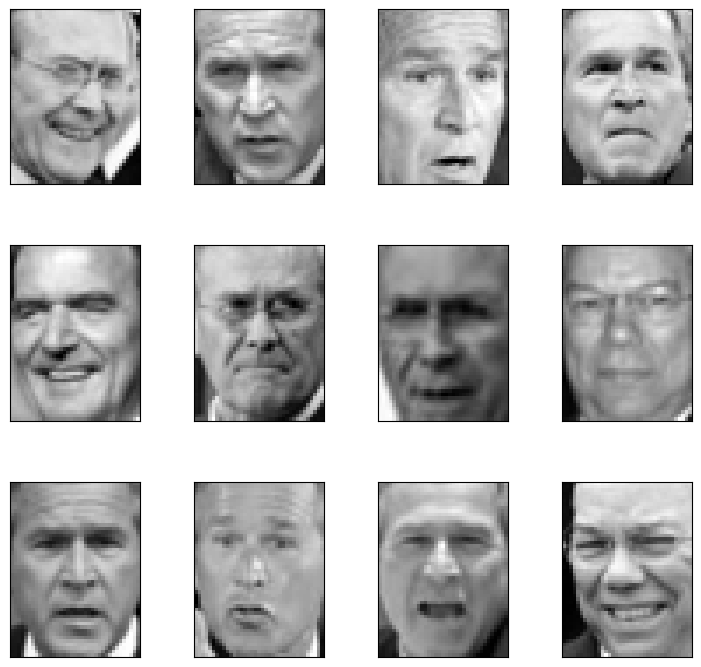

In [14]:
import matplotlib.pyplot as plt

images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(772, 50, 37, 1)
(772, 7)
(516, 50, 37, 1)


# Zad. (Punkt odniesienia)

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwową licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.callbacks import History

history_dense_1 = History()
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=20,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_dense_1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1850)              0         
                                                                 
 dense (Dense)               (None, 7)                 12957     
                                                                 
Total params: 12957 (50.61 KB)
Trainable params: 12957 (50.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 1.9236 - categorical_accuracy: 0.4111 - val_loss: 1.9074 - val_categorical_accuracy: 0.3782
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 1.8778 - categorical_accuracy: 0.4231 - val_loss: 1.8744 - val_categorical_accuracy: 0.3782
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 1.8407 - cat

In [17]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 0s 1ms/step - loss: 1.6573 - categorical_accuracy: 0.4109


[1.657329797744751, 0.41085270047187805]

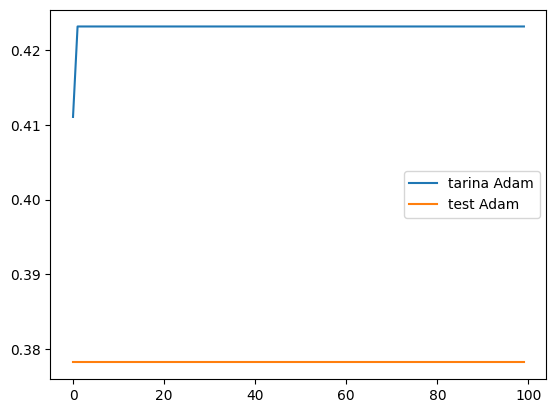

In [18]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina Adam")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Zad

Sprawdź czy dwie warstwy poprawią wynik?

# Sieci konwolucyjne

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D

In [21]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

In [22]:
history_conv_1 = History()
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_1])
model.evaluate(X_test,y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 35, 16)        160       
                                                                 
 flatten_1 (Flatten)         (None, 26880)             0         
                                                                 
 dense_1 (Dense)             (None, 7)                 188167    
                                                                 
Total params: 188327 (735.65 KB)
Trainable params: 188327 (735.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 1s 19ms/step - loss: 1.7520 - categorical_accuracy: 0.4111 - val_loss: 1.7465 - val_categorical_accuracy: 0.3782
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 1.7100 - categorical_accuracy: 0.4231 -

[0.6852441430091858, 0.7906976938247681]

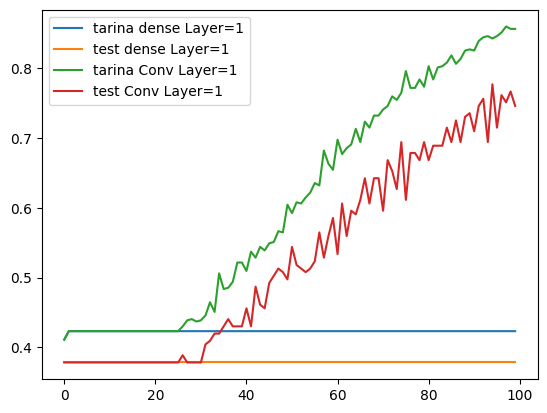

In [23]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

# plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
# plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

plt.plot(history_conv_1.history['categorical_accuracy'], label = "tarina Conv Layer=1")
plt.plot(history_conv_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.legend()
plt.show()

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D
* MaxPooling2D

In [24]:
history_conv_max_1 = History()
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_1])
model.evaluate(X_test,y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 35, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 17, 16)        0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 6528)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 45703     
                                                                 
Total params: 45863 (179.15 KB)
Trainable params: 45863 (179.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 2s 20ms/step - loss: 1.7928 -

[1.2594002485275269, 0.5271317958831787]

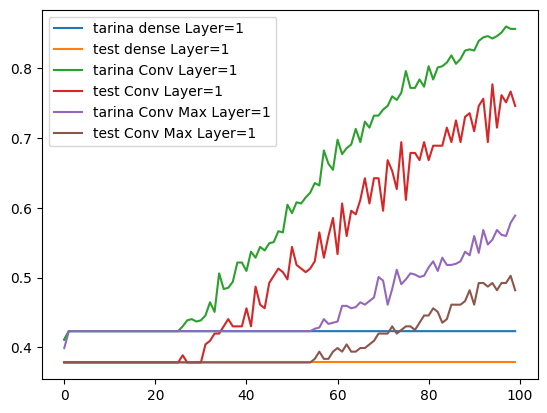

In [25]:
plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina dense Layer=1")
plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

# plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
# plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

plt.plot(history_conv_1.history['categorical_accuracy'], label = "tarina Conv Layer=1")
plt.plot(history_conv_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.plot(history_conv_max_1.history['categorical_accuracy'], label = "tarina Conv Max Layer=1")
plt.plot(history_conv_max_1.history['val_categorical_accuracy'], label = "test Conv Max Layer=1")

plt.legend()
plt.show()

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D (,padding="same")
* MaxPooling2D

# Zad
Zbuduj sieć konwolucyjną z jedną warstwą 
* Conv2D (,padding="same")
* MaxPooling2D
* Conv2D (,padding="same")
* MaxPooling2D

In [26]:
history_conv_max_2 = History()
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:],padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,(2,2),padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_2])
model.evaluate(X_test,y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 37, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 18, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 18, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 9, 16)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1728)              0         
                                                                 
 dense_3 (Dense)             (None, 7)                

[0.6481356024742126, 0.8042635917663574]

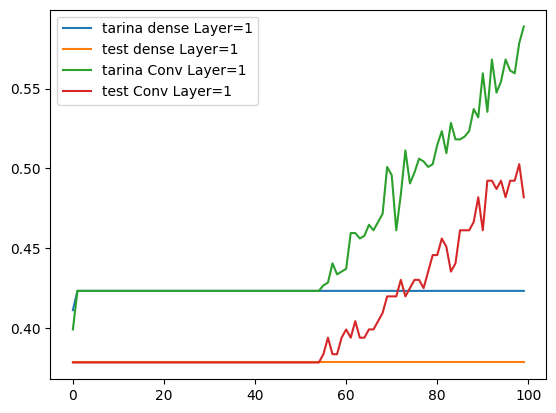

In [30]:
# plt.plot(history_dense_1.history['categorical_accuracy'], label = "tarina dense Layer=1")
# plt.plot(history_dense_1.history['val_categorical_accuracy'], label = "test dense Layer=1")

plt.plot(history_dense_2.history['categorical_accuracy'], label = "tarina dense Layer=2")
plt.plot(history_dense_2.history['val_categorical_accuracy'], label = "test dense Layer=2")

# plt.plot(history_conv_max_1.history['categorical_accuracy'], label = "tarina Conv Layer=1")
# plt.plot(history_conv_max_1.history['val_categorical_accuracy'], label = "test Conv Layer=1")

plt.plot(history_conv_max_2.history['categorical_accuracy'], label = "tarina Conv Layer=2")
plt.plot(history_conv_max_2.history['val_categorical_accuracy'], label = "test Conv Layer=2")

plt.legend()
plt.show()

# Zad.

Dodaj: 

* BatchNormalization
* Dropout

```python
model.add(layers.Conv2D(64, (3, 3), ...))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
```

* Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D).
* Often, dropout is only used after the pooling layers, but this is just a rough heuristic.